In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df = pd.read_csv('../data/1_interm/musicbrainz_artists_random.csv')
df.head()

,artist_id,name,sort_name,type,country,begin_area,begin_date,end_date,genres,tags,release_groups,timestamp
0,31c86a97-8064-4585-9f38-bb4168537361,Moon,Moon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Risa and the Snake, Regolith, Death Construction",2025-04-10T12:17:07.108799
1,80db0f72-c894-417e-b613-91e864da68e6,Brian Burger,Brian Burger,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Warhammer EP, Assault",2025-04-10T12:17:08.983859
2,00668541-a00a-4376-bac5-8e9d7a42d41e,Pace,Pace,Person,NaN,Phoenix,NaN,NaN,NaN,NaN,Animal House,2025-04-10T12:17:10.744596
3,3c7de0f1-ae0e-4ae5-8554-d26641e9c3a5,MASAKOTO150,MASAKOTO150,Person,NaN,NaN,NaN,NaN,NaN,NaN,錯覚 MASTER,2025-04-10T12:17:12.456312
4,6a7a758c-fe13-4c58-b1c9-34bb36fbeada,Gérard Thifault,"Thifault, Gérard",Person,NaN,Port-au-Prince,NaN,NaN,NaN,NaN,Ay-Bo-Le,2025-04-10T12:17:14.214018


In [27]:
df.shape

(25, 12)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   artist_id       25 non-null     object 
 1   name            25 non-null     object 
 2   sort_name       25 non-null     object 
 3   type            20 non-null     object 
 4   country         3 non-null      object 
 5   begin_area      5 non-null      object 
 6   begin_date      3 non-null      object 
 7   end_date        0 non-null      float64
 8   genres          4 non-null      object 
 9   tags            5 non-null      object 
 10  release_groups  24 non-null     object 
 11  timestamp       25 non-null     object 
dtypes: float64(1), object(11)
memory usage: 2.5+ KB


In [29]:
df.isnull().sum()

artist_id          0
name               0
sort_name          0
type               5
country           22
begin_area        20
begin_date        22
end_date          25
genres            21
tags              20
release_groups     1
timestamp          0
dtype: int64

In [30]:
df.shape

(25, 12)

In [31]:
df.isnull().sum()

artist_id          0
name               0
sort_name          0
type               5
country           22
begin_area        20
begin_date        22
end_date          25
genres            21
tags              20
release_groups     1
timestamp          0
dtype: int64

In [32]:
df.shape

(25, 12)

In [33]:
df[df.duplicated(keep=False)]

,artist_id,name,sort_name,type,country,begin_area,begin_date,end_date,genres,tags,release_groups,timestamp


In [34]:
df.describe(include="object")

,artist_id,name,sort_name,type,country,begin_area,begin_date,genres,tags,release_groups,timestamp
count,25,25,25,20,3,5,3,4,5,24,25
unique,25,25,25,2,2,5,3,4,5,24,25
top,31c86a97-8064-4585-9f38-bb4168537361,Moon,Moon,Person,GB,Phoenix,1991-01-07,"ambient, drone, electronic, experimental, noise","artist, music, producer","Risa and the Snake, Regolith, Death Construction",2025-04-10T12:17:07.108799
freq,1,1,1,19,2,1,1,1,1,1,1


In [35]:
values = df["genres"].unique()
values

array([nan, 'ambient, drone, electronic, experimental, noise',
       'drum and bass',
       'contemporary r&b, dance-pop, electropop, pop, singer-songwriter',
       'contemporary r&b, hip hop, pop rap, r&b'], dtype=object)

In [36]:
values_begin_area = df["begin_area"].unique()
values_begin_area

array([nan, 'Phoenix', 'Port-au-Prince', 'Lagos', 'Casablanca',
       'Los Angeles'], dtype=object)

In [37]:
values_tags = df["tags"].unique()
values_tags

array([nan, 'artist, music, producer',
       'ambient, drone, electronic, experimental, noise', 'drum and bass',
       'banks, contemporary r&b, dance pop, dance-pop, electropop, h.e.r., julia michaels, pop, singer-songwriter',
       'contemporary r&b, hip hop, pop rap, r&b, rap'], dtype=object)

In [38]:
values_tags = df["type"].unique()
values_tags

array([nan, 'Person', 'Group'], dtype=object)

In [39]:
values_release_groups = df["release_groups"].unique()
values_release_groups

array(['Risa and the Snake, Regolith, Death Construction',
       'Warhammer EP, Assault', 'Animal House', '錯覚 MASTER', 'Ay-Bo-Le',
       'Can You Imagine',
       'Control, Get Loose, Fine Girl, Break The Rules',
       'Oulad lghaba, L´bnat', 'You Believe In Satan?',
       "It's Okay to Die", "He's God All the Time",
       'Salute to James Taylor', 'Midi Canoe',
       'Critical / Fall, Milestone, SMACKDOWN, Technoid EP',
       'Numbers, Cold Coffee',
       'Fragments, breathe, i need to vent, just a lil, april', 'Undone',
       'Strain Studies', 'Scha!', 'Restart', nan,
       'The Myth of Fitting In, Golden, Stuck in the Middle',
       'Garage Tapes',
       'Astral, I Wanna Rave, K‐Hole, On Acid, White Hearts, Don’t Let Me Go, Goes Like This, Pills (Deborah de Luca remix)',
       'Vaihtuvat perspektiivit'], dtype=object)

In [40]:
values_begin_date = df["begin_date"].unique()
values_begin_date

array([nan, '1991-01-07', '1998', '2013'], dtype=object)

In [41]:
values_end_date  = df["end_date"].unique()
values_end_date 

array([nan])

In [42]:
values_timestamp = df["timestamp"].unique()
values_timestamp

array(['2025-04-10T12:17:07.108799', '2025-04-10T12:17:08.983859',
       '2025-04-10T12:17:10.744596', '2025-04-10T12:17:12.456312',
       '2025-04-10T12:17:14.214018', '2025-04-10T12:17:15.988125',
       '2025-04-10T12:17:17.681690', '2025-04-10T12:17:19.456761',
       '2025-04-10T12:17:21.175363', '2025-04-10T12:17:22.903205',
       '2025-04-10T12:17:24.684829', '2025-04-10T12:17:26.472827',
       '2025-04-10T12:17:28.234856', '2025-04-10T12:17:29.909359',
       '2025-04-10T12:17:31.663372', '2025-04-10T12:17:33.426274',
       '2025-04-10T12:17:35.166838', '2025-04-10T12:17:36.970415',
       '2025-04-10T12:17:38.736958', '2025-04-10T12:17:40.495703',
       '2025-04-10T12:17:42.158251', '2025-04-10T12:17:43.952163',
       '2025-04-10T12:17:45.641240', '2025-04-10T12:17:47.413296',
       '2025-04-10T12:17:49.197323'], dtype=object)

In [43]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['end_date'] = pd.to_datetime(df['end_date'], format='%Y-%m-%d')

In [44]:
df.dtypes

artist_id                 object
name                      object
sort_name                 object
type                      object
country                   object
begin_area                object
begin_date                object
end_date          datetime64[ns]
genres                    object
tags                      object
release_groups            object
timestamp         datetime64[ns]
dtype: object

In [45]:
df.describe().T

,count,mean,min,25%,50%,75%,max
end_date,0,NaT,NaT,NaT,NaT,NaT,NaT
timestamp,25,2025-04-10 12:17:28.193457152,2025-04-10 12:17:07.108799,2025-04-10 12:17:17.681690112,2025-04-10 12:17:28.234855936,2025-04-10 12:17:38.736957952,2025-04-10 12:17:49.197323


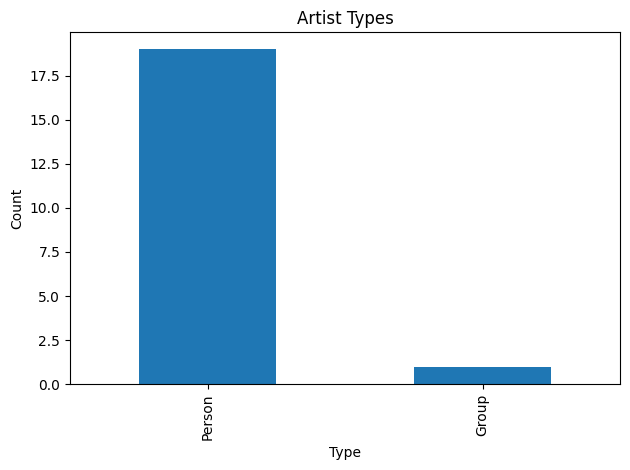

In [46]:
df['type'].value_counts().plot(kind='bar', title='Artist Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

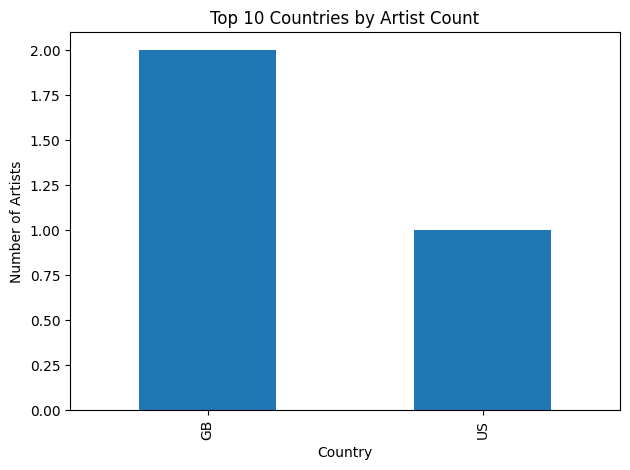

In [47]:
df['country'].value_counts().head(10).plot(kind='bar', title='Top 10 Countries by Artist Count')
plt.xlabel('Country')
plt.ylabel('Number of Artists')
plt.tight_layout()
plt.show()


In [49]:
if df['end_date'].notna().sum() > 0:
    df['end_date'].dt.year.value_counts().sort_index().plot(
        kind='bar', 
        title='Career End Year Distribution'
    )
    plt.xlabel('Year')
    plt.ylabel('Number of Artists Ended')
    plt.tight_layout()
    plt.show()
else:
    print("No hay datos válidos en 'end_date' para graficar.")


No hay datos válidos en 'end_date' para graficar.


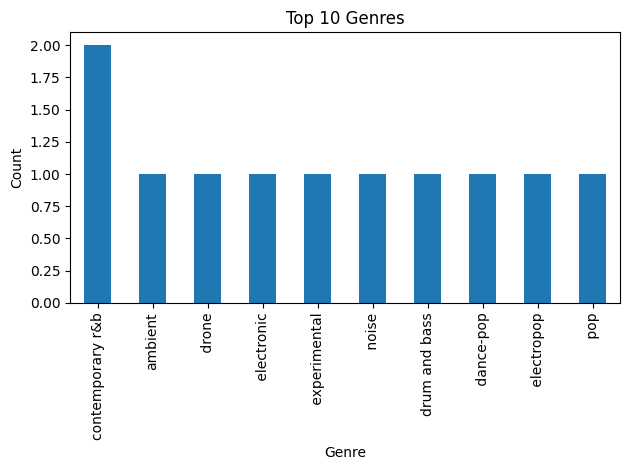

In [ ]:
genre_counts = Counter()
df['genres'].dropna().apply(lambda x: genre_counts.update(x.split(',')))
pd.Series(dict(genre_counts)).sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
